# **Hazardous Asteroid Prediction Using Machine Learning** 

# **import librarys**

In [203]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# **Resd the data set**

In [204]:
df = pd.read_csv('WISE_NEA_COMET_DISCOVERY_STATISTICS.csv')

In [205]:
#first five row  of data
df.head()

,Designation,Discovery Date YYYY-MM-DD,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class
0,419880 (2011 AH37),01/07/2011,19.7,0.035,0.84,4.26,4.06,9.65,Y,Apollo
1,419624 (2010 SO16),09/17/2010,20.5,0.028,0.93,1.08,1.00,14.52,Y,Apollo
2,414772 (2010 OC103),07/28/2010,19.0,0.333,0.39,2.00,1.31,23.11,N,Apollo
3,414746 (2010 EH20),03/06/2010,18.0,0.268,1.25,3.99,4.24,23.89,N,Amor
4,407324 (2010 OB101),07/18/2010,20.7,0.111,0.77,2.46,2.06,9.12,N,Apollo


In [206]:
# lost five row of data
df.tail()

,Designation,Discovery Date YYYY-MM-DD,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class
197,(2010 CO1),02/01/2010,21.5,0.023,0.79,1.23,1.02,24.03,Y,Apollo
198,P/2010 B2 (WISE),01/22/2010,NaN,0.630,1.62,4.60,5.49,8.93,NaN,Encke-type Comet
199,(2010 AU118),01/13/2010,17.7,0.147,1.13,2.12,2.06,43.73,N,Amor
200,(2010 AG79),01/13/2010,19.9,0.244,1.22,4.59,4.95,32.96,N,Amor
201,(2010 AB78),01/12/2010,18.3,0.206,1.02,3.49,3.38,33.26,N,Amor


# **EDA**

In [207]:
# informatiom about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Designation                202 non-null    object 
 1   Discovery Date YYYY-MM-DD  202 non-null    object 
 2   H (mag)                    181 non-null    float64
 3   MOID (AU)                  202 non-null    float64
 4   q (AU)                     202 non-null    float64
 5   Q (AU)                     200 non-null    float64
 6   period (yr)                200 non-null    float64
 7   i (deg)                    202 non-null    float64
 8   PHA                        181 non-null    object 
 9   Orbit Class                202 non-null    object 
dtypes: float64(6), object(4)
memory usage: 15.9+ KB


In [208]:
# column of data set
df.columns

Index(['Designation', 'Discovery Date YYYY-MM-DD', 'H (mag)', 'MOID (AU)',
       'q (AU)', 'Q (AU)', 'period (yr)', 'i (deg)', 'PHA', 'Orbit Class'],
      dtype='object')

In [209]:
# data typs of data set
df.dtypes

Designation                   object
Discovery Date YYYY-MM-DD     object
H (mag)                      float64
MOID (AU)                    float64
q (AU)                       float64
Q (AU)                       float64
period (yr)                  float64
i (deg)                      float64
PHA                           object
Orbit Class                   object
dtype: object

In [210]:
# check a null value  in data set
df.isnull().sum()

Designation                   0
Discovery Date YYYY-MM-DD     0
H (mag)                      21
MOID (AU)                     0
q (AU)                        0
Q (AU)                        2
period (yr)                   2
i (deg)                       0
PHA                          21
Orbit Class                   0
dtype: int64

In [211]:
# describe the data of dataset'
df.describe().T

,count,mean,std,min,25%,50%,75%,max
H (mag),181.0,20.310497,1.521932,15.6000,19.4000,20.300,21.30000,24.300
MOID (AU),202.0,0.330541,0.723355,0.0002,0.0545,0.149,0.26875,6.373
q (AU),202.0,1.063515,0.743516,0.1400,0.7725,0.970,1.11000,7.150
Q (AU),200.0,235.349500,2040.071002,1.0400,2.0925,3.470,4.56000,23255.110
period (yr),200.0,10723.734900,103317.358333,0.7200,1.8550,3.250,4.39000,1254179.620
i (deg),202.0,29.382772,27.307793,0.8200,14.0825,22.945,34.20250,162.300


In [212]:
# check the duplicat value of data set
df.duplicated().T

0      False
1      False
2      False
3      False
4      False
       ...  
197    False
198    False
199    False
200    False
201    False
Length: 202, dtype: bool

In [213]:
# target column value count
df['Orbit Class'].value_counts()

Orbit Class
Apollo                   105
Amor                      61
Aten                      15
Comet                      9
Jupiter-family Comet       6
Halley-type Comet*         2
Parabolic Comet            2
Jupiter-family Comet*      1
Encke-type Comet           1
Name: count, dtype: int64

In [214]:
df.shape

(202, 10)

In [215]:
df.isnull().sum()

Designation                   0
Discovery Date YYYY-MM-DD     0
H (mag)                      21
MOID (AU)                     0
q (AU)                        0
Q (AU)                        2
period (yr)                   2
i (deg)                       0
PHA                          21
Orbit Class                   0
dtype: int64

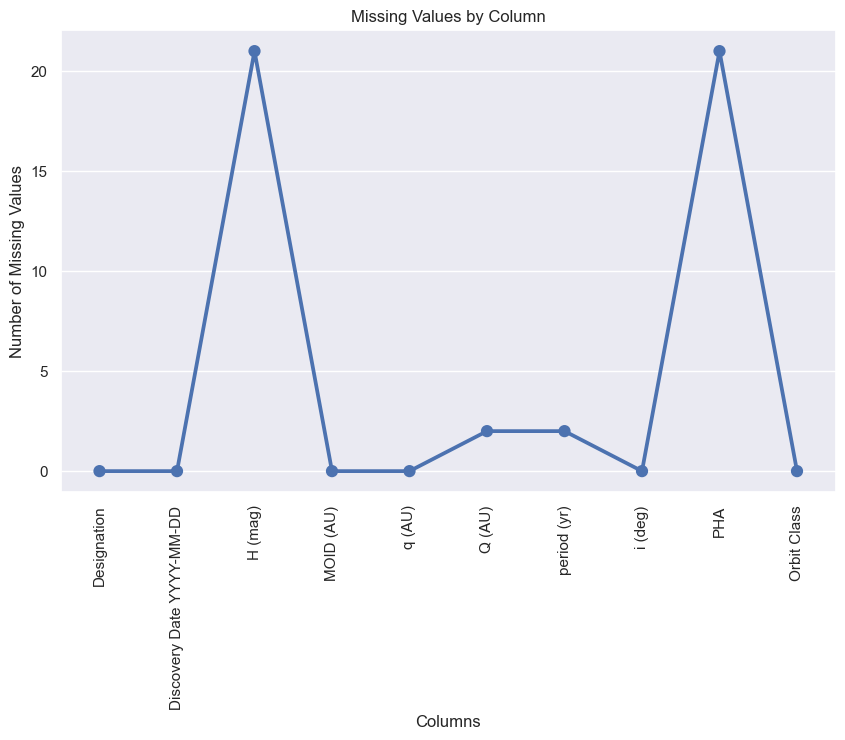

In [216]:
missing_values_count = df.isnull().sum()

# Create a bar plot to visualize missing values
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.pointplot(x=missing_values_count.index, y=missing_values_count.values)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values by Column')
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


___________________________________________________
The duplicated values of dataset 0
___________________________________________________


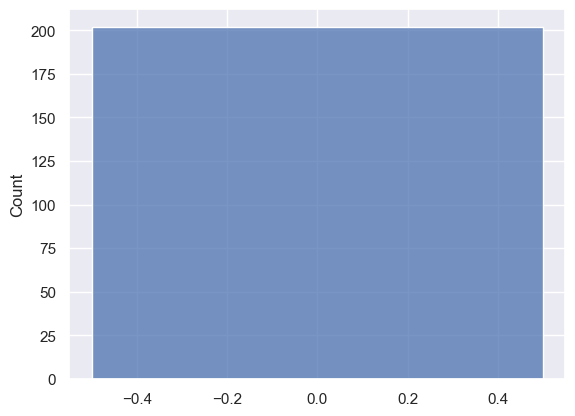

In [217]:
sns.histplot(df.duplicated())
print('___________________________________________________')
print("The duplicated values of dataset"+' '+str(df.duplicated().sum()))
print('___________________________________________________')

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Designation                202 non-null    object 
 1   Discovery Date YYYY-MM-DD  202 non-null    object 
 2   H (mag)                    181 non-null    float64
 3   MOID (AU)                  202 non-null    float64
 4   q (AU)                     202 non-null    float64
 5   Q (AU)                     200 non-null    float64
 6   period (yr)                200 non-null    float64
 7   i (deg)                    202 non-null    float64
 8   PHA                        181 non-null    object 
 9   Orbit Class                202 non-null    object 
dtypes: float64(6), object(4)
memory usage: 15.9+ KB


<Axes: xlabel='Orbit Class', ylabel='Count'>

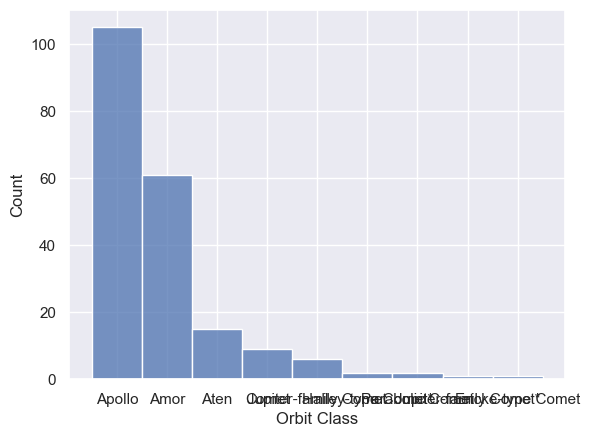

In [219]:
# show the target column in hist plot
sns.histplot(df['Orbit Class'])

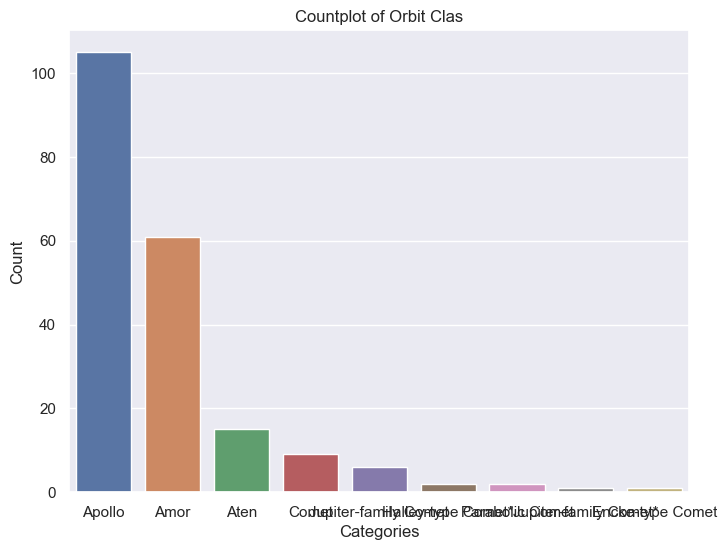

In [220]:
# This code uses Seaborn to create a countplot of the 
# 'label' column from the DataFrame 'df', visualizing the distribution of categories in the textual data.
sns.set(style='darkgrid')  # Set the style for the plot
plt.figure(figsize=(8, 6))  # Set the size of the plot

# Use the `countplot` function from Seaborn to create the plot
sns.countplot(x=df['Orbit Class'])

plt.title('Countplot of Orbit Clas')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.show()

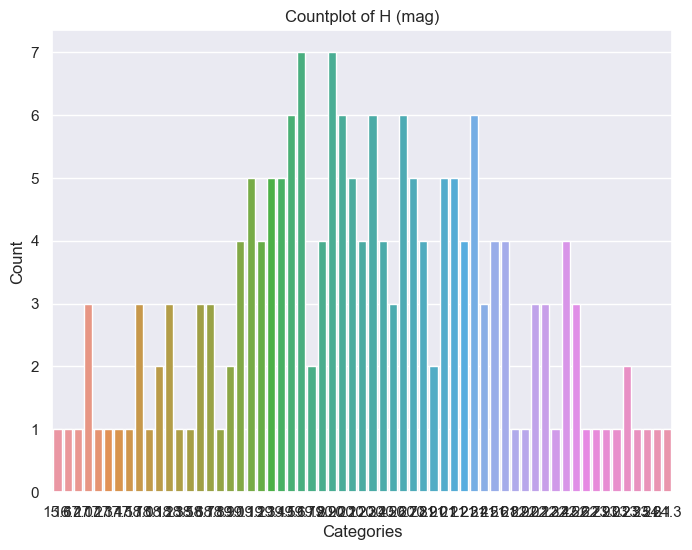

In [221]:
# This code uses Seaborn to create a countplot of the 
# 'label' column from the DataFrame 'df', visualizing the distribution of categories in the textual data.
sns.set(style='darkgrid')  # Set the style for the plot
plt.figure(figsize=(8, 6))  # Set the size of the plot

# Use the `countplot` function from Seaborn to create the plot
sns.countplot(x=df['H (mag)'])

plt.title('Countplot of H (mag)')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.show()

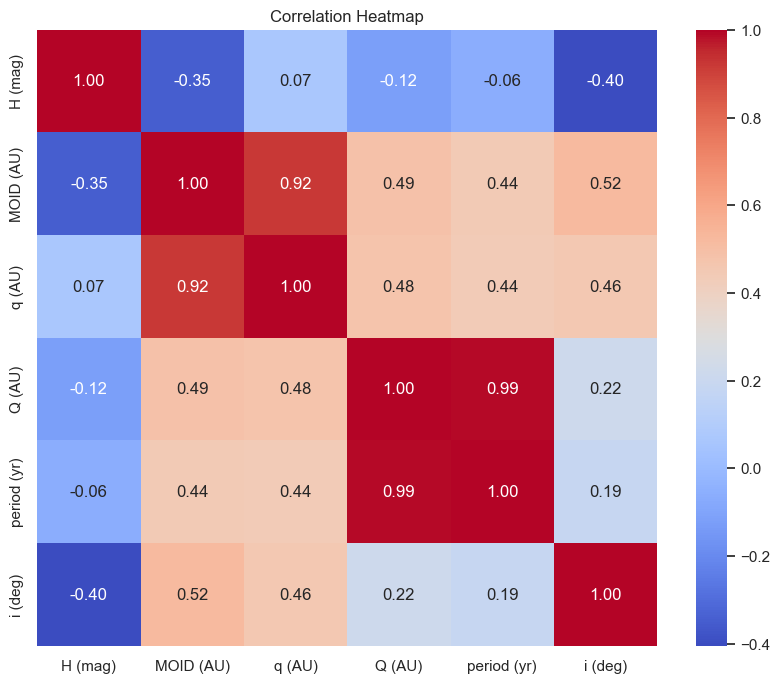

In [222]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

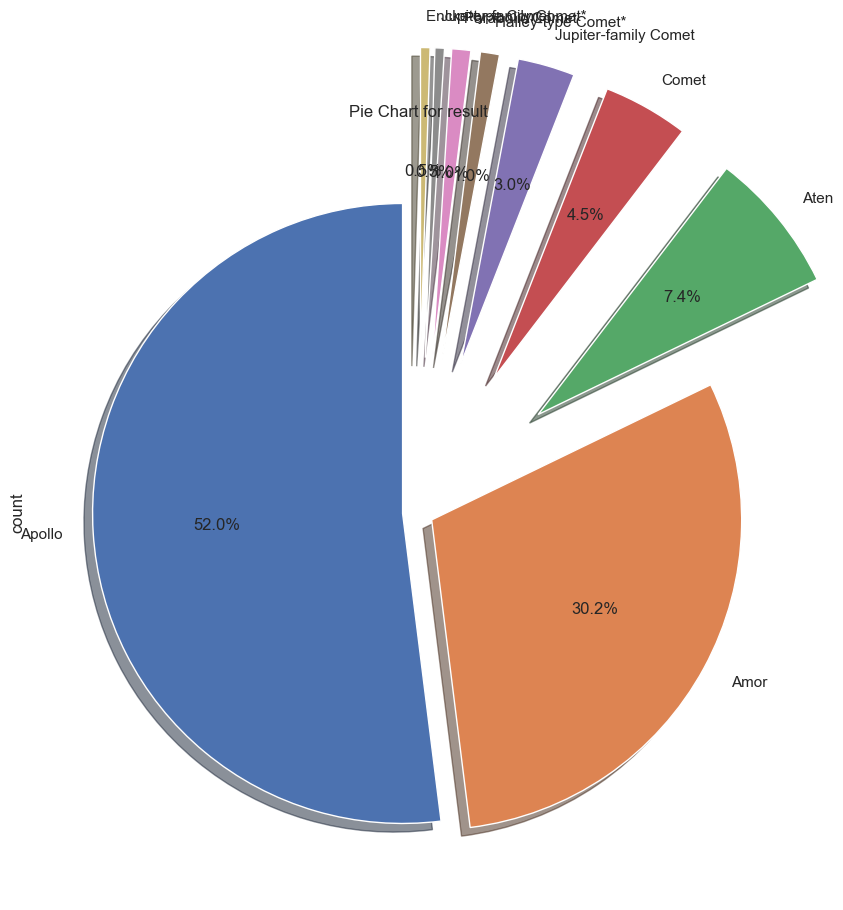

In [223]:
# pie chart of target column
df['Orbit Class'].value_counts().plot.pie(explode=[0.05,0.05,0.5,0.5,0.5,0.5,0.5,0.5,0.5], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(10,18))
plt.title('Pie Chart for result')
plt.show()

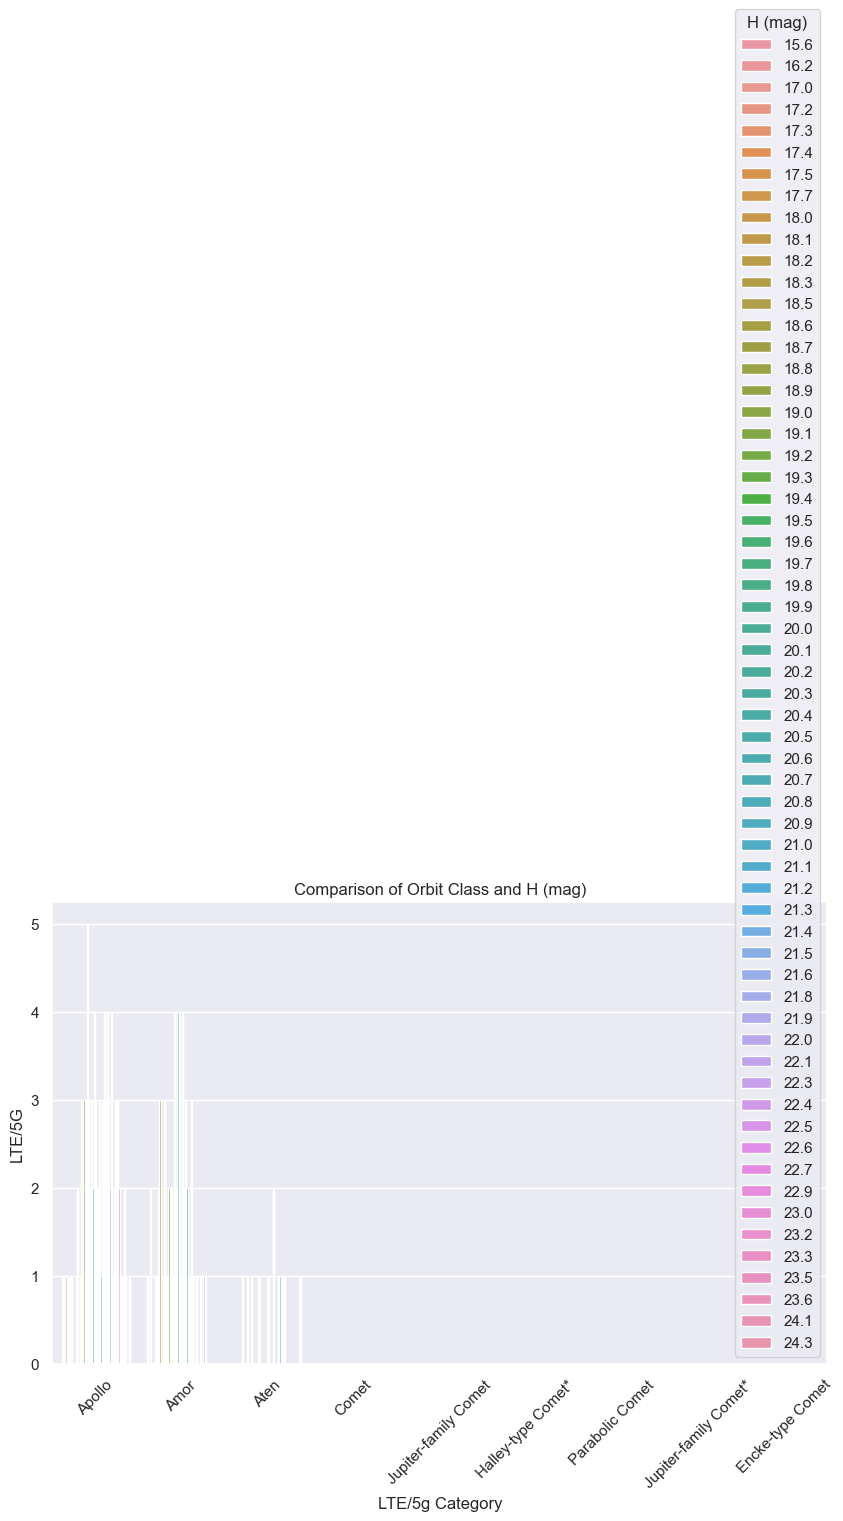

In [224]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Orbit Class', hue='H (mag)')

plt.title('Comparison of Orbit Class and H (mag)')
plt.xlabel('LTE/5g Category')
plt.ylabel('LTE/5G')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

# **Preprocessing**

In [225]:
df.isnull().sum()

Designation                   0
Discovery Date YYYY-MM-DD     0
H (mag)                      21
MOID (AU)                     0
q (AU)                        0
Q (AU)                        2
period (yr)                   2
i (deg)                       0
PHA                          21
Orbit Class                   0
dtype: int64

In [226]:
# Drop unknown column
df.drop('Discovery Date YYYY-MM-DD',axis=1,inplace=True)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Designation  202 non-null    object 
 1   H (mag)      181 non-null    float64
 2   MOID (AU)    202 non-null    float64
 3   q (AU)       202 non-null    float64
 4   Q (AU)       200 non-null    float64
 5   period (yr)  200 non-null    float64
 6   i (deg)      202 non-null    float64
 7   PHA          181 non-null    object 
 8   Orbit Class  202 non-null    object 
dtypes: float64(6), object(3)
memory usage: 14.3+ KB


In [228]:
df.ffill(inplace=True)

In [229]:
df.isnull().sum()

Designation    0
H (mag)        0
MOID (AU)      0
q (AU)         0
Q (AU)         0
period (yr)    0
i (deg)        0
PHA            0
Orbit Class    0
dtype: int64

In [230]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
col = df.select_dtypes(object)
for i in col.columns:
    df[i]=la.fit_transform(df[i])

In [231]:
df.head()

,Designation,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class
0,182,19.7,0.035,0.84,4.26,4.06,9.65,1,1
1,181,20.5,0.028,0.93,1.08,1.00,14.52,1,1
2,180,19.0,0.333,0.39,2.00,1.31,23.11,0,1
3,179,18.0,0.268,1.25,3.99,4.24,23.89,0,0
4,178,20.7,0.111,0.77,2.46,2.06,9.12,0,1


In [232]:
df.shape

(202, 9)

In [233]:
df['Orbit Class'].value_counts()

Orbit Class
1    105
0     61
2     15
3      9
6      6
5      2
8      2
7      1
4      1
Name: count, dtype: int64

In [234]:
x=df.drop('Orbit Class',axis=1)
y=df['Orbit Class']

In [235]:
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler()
a,b = sm.fit_resample(x,y)

In [236]:
b.value_counts()

Orbit Class
1    105
0    105
2    105
3    105
6    105
5    105
8    105
7    105
4    105
Name: count, dtype: int64

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
# splitting the data into training and testing part
x_train,x_test,y_train,y_test = train_test_split(a,b,test_size=0.3,random_state=42)

In [239]:
x_train

,Designation,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA
286,37,18.5,0.316,0.33,1.59,0.94,44.05,0
444,195,21.5,0.630,1.62,4.60,5.49,8.93,1
404,193,21.1,0.866,1.86,214.97,1128.89,151.78,1
425,193,21.1,0.866,1.86,214.97,1128.89,151.78,1
842,186,24.1,1.546,2.27,1.06,0.93,96.48,0
...,...,...,...,...,...,...,...,...
106,80,19.8,0.221,0.49,3.06,2.36,30.18,0
270,19,24.1,0.029,0.85,1.06,0.93,9.75,0
860,189,20.4,0.307,1.09,2.00,1.94,162.30,0
435,195,21.5,0.630,1.62,4.60,5.49,8.93,1


In [240]:
y_train

286    2
444    4
404    3
425    3
842    8
      ..
106    1
270    2
860    8
435    4
102    0
Name: Orbit Class, Length: 661, dtype: int32

In [241]:
x_test

,Designation,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA
848,189,20.4,0.307,1.09,2.00,1.94,162.30,0
333,42,23.6,0.014,0.56,1.04,0.72,3.36,0
280,172,20.3,0.155,0.44,1.49,0.95,11.23,0
30,150,20.6,0.312,0.66,4.65,4.32,31.05,0
168,23,21.8,0.027,1.01,4.35,4.38,1.68,1
...,...,...,...,...,...,...,...,...
309,37,18.5,0.316,0.33,1.59,0.94,44.05,0
689,200,20.9,0.854,1.86,5.55,7.13,24.10,0
212,58,19.2,0.166,1.10,3.43,3.42,33.17,0
79,105,20.1,0.062,1.04,4.28,4.34,19.98,0


In [242]:
y_test

848    8
333    2
280    2
30     1
168    1
      ..
309    2
689    6
212    0
79     0
148    1
Name: Orbit Class, Length: 284, dtype: int32

# **Module Train**

In [243]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

## **DecisionTreeClassifier**

In [244]:
de = DecisionTreeClassifier(ccp_alpha=0.01)
de.fit(x_train,y_train)
de_pred=de.predict(x_test)
de_ac = accuracy_score(de_pred,y_test)
de_cl = classification_report(de_pred,y_test)

In [245]:
de_ac

0.9964788732394366

In [246]:
de_cl

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99        33\n           1       1.00      1.00      1.00        30\n           2       1.00      1.00      1.00        40\n           3       1.00      1.00      1.00        28\n           4       1.00      1.00      1.00        34\n           5       1.00      1.00      1.00        31\n           6       1.00      0.97      0.98        32\n           7       1.00      1.00      1.00        25\n           8       1.00      1.00      1.00        31\n\n    accuracy                           1.00       284\n   macro avg       1.00      1.00      1.00       284\nweighted avg       1.00      1.00      1.00       284\n'

## **KNeighborsClassifier**

In [247]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred =  kn.predict(x_test)
kn_ac = accuracy_score(kn_pred,y_test)
kn_cl = classification_report(kn_pred,y_test)

In [248]:
kn_ac

0.9049295774647887

In [249]:
kn_cl

'              precision    recall  f1-score   support\n\n           0       0.65      0.71      0.68        31\n           1       0.50      0.60      0.55        25\n           2       1.00      0.85      0.92        47\n           3       1.00      1.00      1.00        28\n           4       1.00      1.00      1.00        34\n           5       1.00      1.00      1.00        31\n           6       1.00      0.97      0.98        32\n           7       1.00      1.00      1.00        25\n           8       1.00      1.00      1.00        31\n\n    accuracy                           0.90       284\n   macro avg       0.91      0.90      0.90       284\nweighted avg       0.92      0.90      0.91       284\n'

## **XGBClassifier**

In [250]:
xg = XGBClassifier()
xg.fit(x_train,y_train)
xg_pred =  xg.predict(x_test)
xg_ac = accuracy_score(xg_pred,y_test)
xg_cl =  classification_report(xg_pred,y_test)

In [251]:
xg_ac

1.0

In [252]:
xg_cl

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        34\n           1       1.00      1.00      1.00        30\n           2       1.00      1.00      1.00        40\n           3       1.00      1.00      1.00        28\n           4       1.00      1.00      1.00        34\n           5       1.00      1.00      1.00        31\n           6       1.00      1.00      1.00        31\n           7       1.00      1.00      1.00        25\n           8       1.00      1.00      1.00        31\n\n    accuracy                           1.00       284\n   macro avg       1.00      1.00      1.00       284\nweighted avg       1.00      1.00      1.00       284\n'

## **LogisticRegression**

In [253]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg_pred = lg.predict(x_test)
lg_ac = accuracy_score(xg_pred,y_test)
lg_cl = classification_report(xg_pred,y_test)

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [254]:
lg_ac

1.0

In [255]:
lg_cl

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        34\n           1       1.00      1.00      1.00        30\n           2       1.00      1.00      1.00        40\n           3       1.00      1.00      1.00        28\n           4       1.00      1.00      1.00        34\n           5       1.00      1.00      1.00        31\n           6       1.00      1.00      1.00        31\n           7       1.00      1.00      1.00        25\n           8       1.00      1.00      1.00        31\n\n    accuracy                           1.00       284\n   macro avg       1.00      1.00      1.00       284\nweighted avg       1.00      1.00      1.00       284\n'

## **MLPClassifier**

In [256]:
ml = MLPClassifier()
ml.fit(x_train,y_train)
ml_pred = ml.predict(x_test)
ml_ac =  accuracy_score(ml_pred,y_test)
ml_cl = classification_report(ml_pred,y_test)

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [257]:
ml_ac

0.9225352112676056

In [258]:
ml_cl

'              precision    recall  f1-score   support\n\n           0       0.82      0.72      0.77        39\n           1       0.47      0.78      0.58        18\n           2       1.00      0.89      0.94        45\n           3       1.00      1.00      1.00        28\n           4       1.00      0.97      0.99        35\n           5       1.00      1.00      1.00        31\n           6       1.00      0.97      0.98        32\n           7       1.00      1.00      1.00        25\n           8       1.00      1.00      1.00        31\n\n    accuracy                           0.92       284\n   macro avg       0.92      0.92      0.92       284\nweighted avg       0.94      0.92      0.93       284\n'

# **Comparison Graph**

In [259]:
graph  = pd.DataFrame({'Algorithem':['DecisionTreeClassifier','KNeighborsClassifier','XGBClassifier','LogisticRegression','MLPClassifier'],
                       'accuracy_score':[de_ac*100,kn_ac*100,xg_ac*100,lg_ac*100,ml_ac*100]})

In [260]:
graph

,Algorithem,accuracy_score
0,DecisionTreeClassifier,99.647887
1,KNeighborsClassifier,90.492958
2,XGBClassifier,100.000000
3,LogisticRegression,100.000000
4,MLPClassifier,92.253521


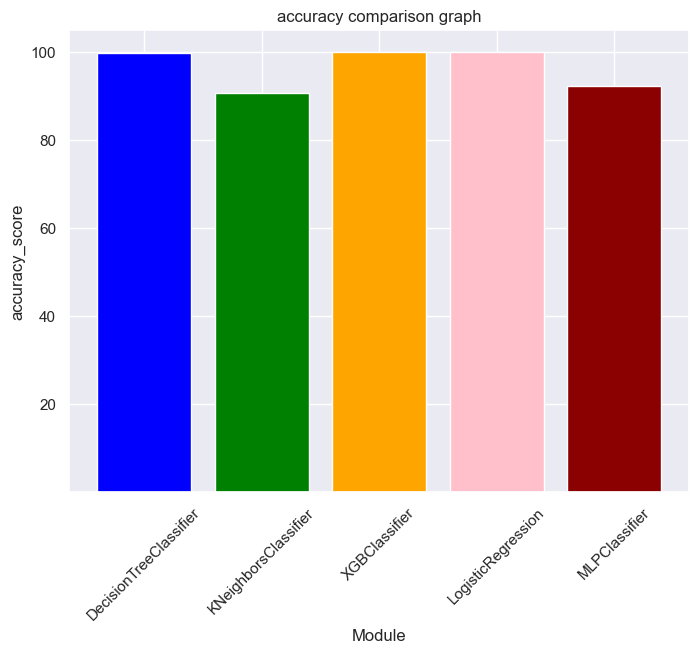

In [261]:
plt.figure(figsize=(8,6))
plt.bar(graph['Algorithem'],graph['accuracy_score'],color=['blue','green','orange','pink','darkred'])
plt.xlabel('Module')
plt.ylabel('accuracy_score')
plt.title('accuracy comparison graph')
plt.ylim(0.100)
plt.xticks(rotation = 45)
plt.show()

# **Prediction**

In [298]:
df.head()

,Designation,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class
0,182,19.7,0.035,0.84,4.26,4.06,9.65,1,1
1,181,20.5,0.028,0.93,1.08,1.00,14.52,1,1
2,180,19.0,0.333,0.39,2.00,1.31,23.11,0,1
3,179,18.0,0.268,1.25,3.99,4.24,23.89,0,0
4,178,20.7,0.111,0.77,2.46,2.06,9.12,0,1


In [305]:
inp = [182,	19.7,	0.035,	0.84,	4.26,	4.06,	9.65,	1	]

In [306]:
kn.predict([inp])

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [307]:
inp1 = [179,	18.0,	0.268,	1.25,	3.99,	4.24,	23.89,	0]

In [308]:
kn.predict([inp1])

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [309]:
inp3 = [172,	20.3,	0.155,	0.44,	1.49,	0.95,	11.23,	0	]

In [310]:
kn.predict([inp3])

C:\Users\0630\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])